<a href="https://colab.research.google.com/github/abrehan2/Big-Data/blob/main/201327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# @title Installing dependencies

!pip install pyspark

In [28]:
# @title Import dependencies

from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# @title Create a SparkSession object

spark = SparkSession.builder.appName("WordCount").getOrCreate()

In [18]:
# @title Read the input text file

textFile = spark.sparkContext.textFile("words_to_count.txt")

In [19]:
# @title Count the number of lines

lineCount = textFile.count()

print("Total lines: ", lineCount)

Total lines:  4652


In [21]:
# @title Count the number of characters per line

characterCount = textFile.map(lambda line: len(line))

print("Total characters per line: ", characterCount.collect())

Total characters per line:  [18, 27, 151, 10, 19, 18, 27, 33, 82, 77, 79, 29, 81, 80, 79, 80, 67, 81, 81, 76, 30, 29, 34, 12, 16, 22, 22, 16, 18, 7, 6, 10, 9, 29, 12, 13, 12, 14, 20, 17, 18, 15, 26, 20, 16, 16, 11, 15, 19, 16, 11, 13, 7, 10, 8, 12, 22, 18, 10, 18, 18, 16, 794, 146, 23, 18, 14, 122, 559, 547, 18, 19, 505, 552, 18, 982, 378, 79, 71, 18, 16, 48, 84, 305, 189, 2, 53, 172, 14, 1, 53, 1, 43, 1, 42, 37, 184, 18, 5, 17, 9, 51, 33, 29, 22, 19, 19, 17, 18, 21, 17, 19, 35, 25, 43, 46, 38, 20, 19, 28, 38, 44, 22, 40, 43, 10, 18, 17, 6, 58, 35, 26, 28, 31, 32, 23, 22, 22, 21, 36, 29, 45, 21, 10, 38, 49, 37, 30, 25, 26, 21, 43, 29, 27, 32, 41, 31, 29, 30, 33, 33, 46, 50, 34, 10, 18, 17, 7, 44, 54, 37, 39, 33, 25, 44, 40, 42, 33, 47, 29, 36, 40, 39, 11, 45, 52, 33, 43, 31, 41, 26, 24, 42, 60, 50, 20, 32, 24, 24, 51, 19, 58, 56, 41, 40, 11, 18, 17, 6, 46, 51, 44, 47, 24, 23, 43, 23, 46, 11, 9, 18, 5, 7, 1132, 187, 21, 406, 18, 7, 6, 474, 317, 238, 157, 660, 526, 27, 193, 212, 18, 7, 7

In [22]:
# @title Sum up all characters to find the total number of characters in the text file

totalCharCount = characterCount.reduce(lambda x, y: x + y)

print("Total characters:", totalCharCount)

Total characters: 266198


In [24]:
# @title Count number of separate words in the text

wordCount = textFile.flatMap(lambda line: line.split()).count()

print("Total number of words:", wordCount)

Total number of words: 37579


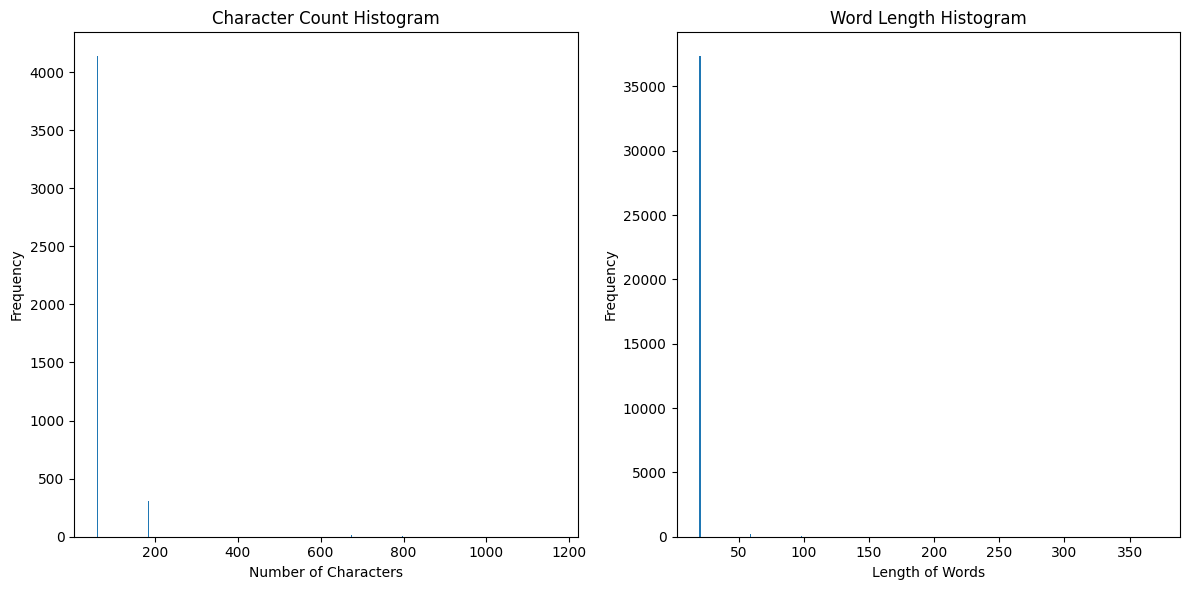

In [29]:
# @title Histogram

charCountHisto = characterCount.collect()
wordCountHisto = textFile.flatMap(lambda line: line.split()).map(lambda word: len(word)).collect()

# Plot the histogram

# Calculate histogram for characters
char_hist, char_bins = np.histogram(charCountHisto, bins=10)
char_bin_centers = 0.5 * (char_bins[:-1] + char_bins[1:])

# Calculate histogram for word lengths
word_hist, word_bins = np.histogram(wordCountHisto, bins=10)
word_bin_centers = 0.5 * (word_bins[:-1] + word_bins[1:])

# Plotting the histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(char_bin_centers, char_hist, width=1)
plt.title("Character Count Histogram")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.bar(word_bin_centers, word_hist, width=1)
plt.title("Word Length Histogram")
plt.xlabel("Length of Words")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()